# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## Dataset Preparation

In [2]:
x,y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=3)

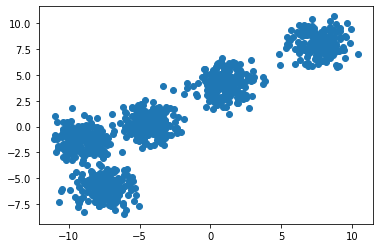

In [5]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [7]:
# Let's define k 
k = 5

color = ['green', 'red', 'blue', 'yellow', 'gray']
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center, 
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    


In [8]:
clusters

{0: {'center': array([ 3.43760052, -8.28593503]),
  'points': [],
  'color': 'green'},
 1: {'center': array([2.73259975, 2.50688188]), 'points': [], 'color': 'red'},
 2: {'center': array([-2.37743812, -2.93905   ]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([5.9435187 , 5.82473366]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([7.78208881, 5.9488267 ]), 'points': [], 'color': 'gray'}}

In [9]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [34]:
# Assign every data point to one of the clusters 
def assignPointToClusters(clusters): #E-step 

    for every_data_point in range(x.shape[0]):
        
        dist = []
        current_x = x[every_data_point]
        for kx in range(k):
            d = distance(current_x, clusters[kx]['center'])
            dist.append(d)
            
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])
    

In [35]:
def updateClusters(clusters): #M-Step -> We update every cluster center according to the mean of the points
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # if cluster has some non-zero points
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            #clear my points list 
            clusters[kx]['points'] = []      
        

In [36]:
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0] > 0:
            plt.scatter(pts[:,0], pts[:,1], color = clusters[kx]['color'])
            
        # plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker='*')

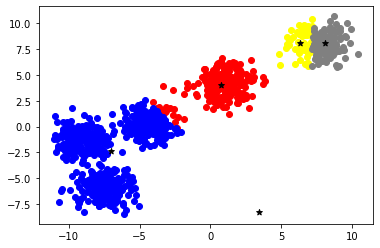

In [40]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [21]:
# Repeat the process of step 2 and step 3 until convergence 

count =1 
while True:
    assignPointToClusters(clusters)
    updateClusters(clusters)
    count+=1
    if count>1000:
        break

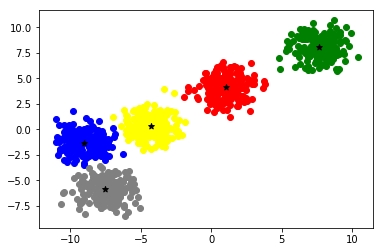

In [22]:
assignPointToClusters(clusters)
plotClusters(clusters)